<a href="https://colab.research.google.com/github/SD346/Detecting-handwritten-digits-using-MNIST-dataset/blob/master/Sayantan_MNIST1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 30kB/s 
     |████████████████████████████████| 4.3MB 42.8MB/s 
     |████████████████████████████████| 501kB 56.1MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization

In [ ]:
print(tf.__version__)

2.0.0-rc0


In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


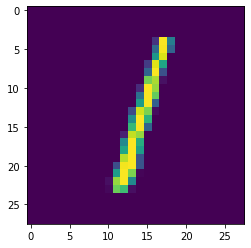

In [ ]:
plt.imshow(x_test[2])

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [ ]:
input_shape = x_train[0].shape

In [ ]:
model = Sequential()
model.add(Conv2D(60, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
model.add(MaxPool2D(2, 2))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(32 , (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Conv2D(60 , (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.15))

model.add(Conv2D(60 , (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(60, activation='relu'))
model.add(Dropout(0.15))

model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 60)        600       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 60)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 60)        240       
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 60)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        17312     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, batch_size=128, epochs= 20, verbose = 1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.2710 - accuracy: 0.9205 - val_loss: 2.0067 - val_accuracy: 0.3604
Epoch 2/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0769 - accuracy: 0.9771 - val_loss: 0.0396 - val_accuracy: 0.9890
Epoch 3/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0591 - accuracy: 0.9826 - val_loss: 0.0290 - val_accuracy: 0.9912
Epoch 4/20
60000/60000 [==============================] - 115s 2ms/sample - loss: 0.0481 - accuracy: 0.9856 - val_loss: 0.0314 - val_accuracy: 0.9905
Epoch 5/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0421 - accuracy: 0.9873 - val_loss: 0.0250 - val_accuracy: 0.9924
Epoch 6/20
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.0393 - accuracy: 0.9878 - val_loss: 0.0242 - val_accuracy: 0.9926
Epoch 7/20
60000/60000 [==========================

In [ ]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.01988248997281662, 0.994]

In [ ]:
model.save('mnist1.h5')